In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Source of data: KCDC (Korea Centers for Disease Control & Prevention)
#https://www.kaggle.com/kimjihoo/coronavirusdataset
# Since the number of confirmed patients exceeds 550, Some confirmed patient informatation has not yet been updated.
patient = pd.read_csv('./input/patient.csv')
patient.head(5)

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [73]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
id                  7383 non-null int64
sex                 430 non-null object
birth_year          417 non-null float64
country             7382 non-null object
region              418 non-null object
disease             26 non-null float64
group               83 non-null object
infection_reason    144 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      50 non-null float64
confirmed_date      7382 non-null object
released_date       55 non-null object
deceased_date       32 non-null object
state               7382 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 865.3+ KB


In [74]:
patient['state'].value_counts()

isolated    7296
released      55
deceased      31
Name: state, dtype: int64

In [75]:
patient['infection_reason'].value_counts()

contact with patient                 75
visit to Daegu                       43
visit to Wuhan                        8
pilgrimage to Israel                  6
contact with patient in Singapore     2
visit to China                        2
visit to Thailand                     2
residence in Wuhan                    2
contact with patient in Japan         1
visit to Vietnam                      1
visit to Japan                        1
visit to Italy                        1
Name: infection_reason, dtype: int64

In [76]:
patient['infected_by'].value_counts()

31.0      8
6.0       5
126.0     3
780.0     3
372.0     3
3.0       2
246.0     2
335.0     2
794.0     2
1252.0    2
83.0      2
161.0     2
27.0      2
15.0      2
16.0      2
1532.0    2
230.0     2
20.0      1
4.0       1
40.0      1
56.0      1
30.0      1
44.0      1
12.0      1
5.0       1
113.0     1
1247.0    1
1251.0    1
164.0     1
121.0     1
938.0     1
627.0     1
835.0     1
188.0     1
29.0      1
136.0     1
1177.0    1
347.0     1
1257.0    1
2621.0    1
1768.0    1
Name: infected_by, dtype: int64

In [77]:
patient['age'] = 2020 - patient['birth_year']

In [78]:
patient.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0


In [79]:
patient['age'].value_counts().head(6)

35.0    24
23.0    12
64.0    12
24.0    11
58.0    10
25.0    10
Name: age, dtype: int64

In [80]:
patient.loc[patient['state'] == 'deceased'].head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
37,38,female,1963.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57.0
53,54,male,1963.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,57.0
54,55,male,1961.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,59.0
103,104,male,1957.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased,63.0
106,107,male,1953.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased,67.0


In [81]:
deceased = patient.loc[patient['state'] == 'deceased']
released = patient.loc[patient['state'] == 'released']
isolated = patient.loc[patient['state'] == 'isolated']

In [82]:
date_column = ["confirmed_date","deceased_date"]

In [83]:
for i in date_column:
    deceased[i] = pd.to_datetime(deceased[i])
deceased["no_of_days_survived"] = deceased["deceased_date"] - deceased["confirmed_date"]
deceased.head(5)

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,no_of_days_survived
37,38,female,1963.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57.0,5 days
53,54,male,1963.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,57.0,4 days
54,55,male,1961.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,59.0,4 days
103,104,male,1957.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased,63.0,-1 days
106,107,male,1953.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased,67.0,3 days


In [84]:
#Adding one more feature to deceased dataset which will contain the number of days patient was admitted before discharged.
date_column = ["confirmed_date","released_date"]
for i in date_column:
    released[i] = pd.to_datetime(released[i])
released["no_of_days_treated"] = released["released_date"] - released["confirmed_date"]
released.head(5)

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,no_of_days_treated
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0,17 days
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0,12 days
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0,17 days
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0,13 days
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0,32 days


In [85]:
print('The percentage of released patient is: ',(len(released) * 100) / len(patient))
print('The percentage of deceased patient is: ',(len(deceased) * 100) / len(patient))
print('The percentage of isolated patient is: ',(len(isolated) * 100) / len(patient))

The percentage of released patient is:  0.7449546254909928
The percentage of deceased patient is:  0.4198835161858323
The percentage of isolated patient is:  98.82161722876879


In [94]:
state = 'Isolated', 'Released', 'Deceased'

In [95]:
type(state)

tuple

In [96]:
sizes = [(len(isolated) * 100) / len(patient),(len(released) * 100) / len(patient),(len(deceased) * 100) / len(patient)]

In [97]:
sizes

[98.82161722876879, 0.7449546254909928, 0.4198835161858323]

In [98]:
explode = (0,1,2)

In [99]:
explode

(0, 1, 2)

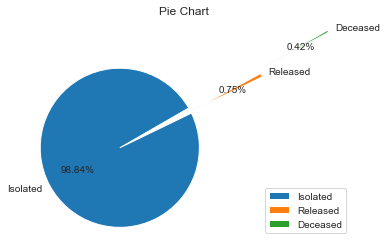

In [100]:
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=state, autopct='%.2f%%',
        shadow=False, startangle=30)
ax.axis('equal')
plt.legend()
plt.title('Pie Chart')
plt.show()

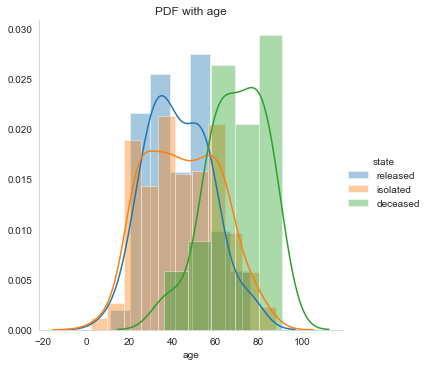

In [101]:
sns.FacetGrid(patient, hue="state", size = 5).map(sns.distplot, "age").add_legend()
plt.title('PDF with age')
plt.grid()
plt.show()

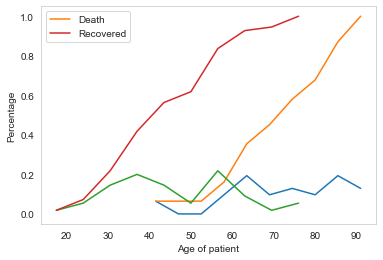

In [102]:
counts, bin_edges = np.histogram(deceased['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label = 'Death')

counts, bin_edges = np.histogram(released['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label = 'Recovered')

plt.xlabel('Age of patient')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.show()

isolated    7296
released      55
deceased      31
Name: state, dtype: int64


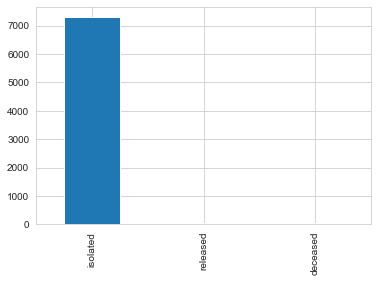

In [107]:
patient.state.value_counts().plot.bar()
print(patient.state.value_counts())

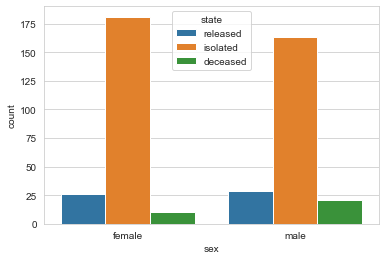

In [108]:
sns.countplot(x="sex", hue="state", data=patient)

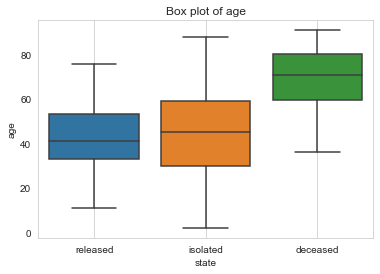

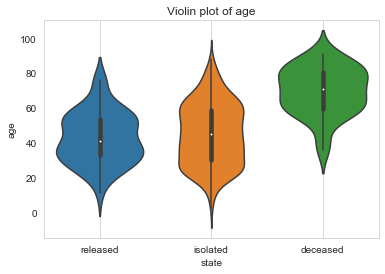

In [111]:
sns.boxplot(x = 'state',y = 'age', data = patient)
plt.title('Box plot of age')
plt.grid()
plt.show()

sns.violinplot(x = 'state', y= 'age', data = patient, size = 4)
plt.title('Violin plot of age')
plt.grid()
plt.show()

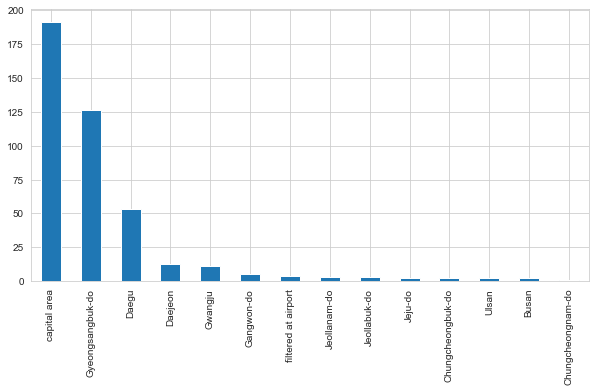

In [115]:
# Since the number of confirmed patients exceeds 550, KCDC is not updated patient's region data. 
plt.figure(figsize=(10,5))
patient.region.value_counts().plot.bar()

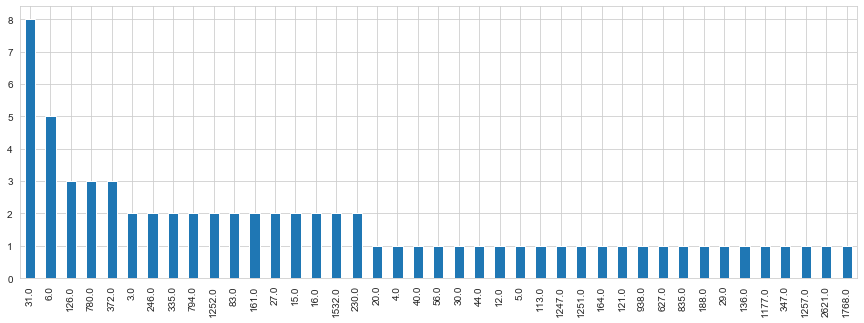

In [114]:
plt.figure(figsize=(15,5))
patient.infected_by.value_counts().plot.bar()

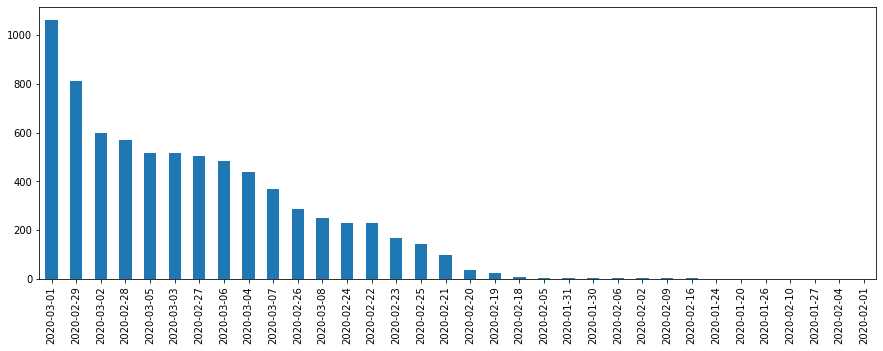

In [66]:
plt.figure(figsize=(15,5))
patient.confirmed_date.value_counts().plot.bar()

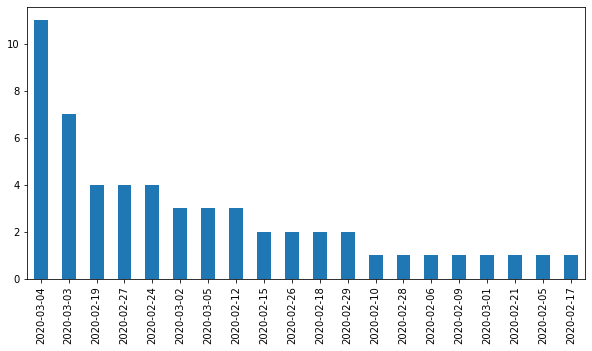

In [68]:
plt.figure(figsize=(10,5))
patient.released_date.value_counts().plot.bar()

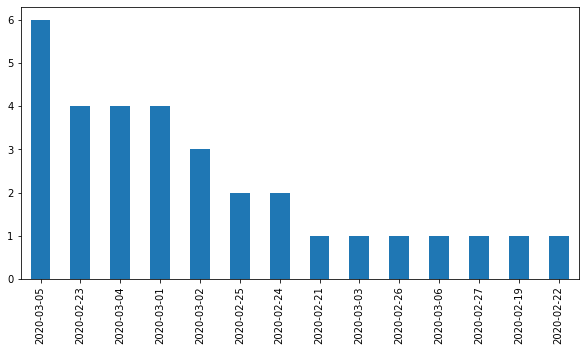

In [69]:
plt.figure(figsize=(10,5))
patient.deceased_date.value_counts().plot.bar()

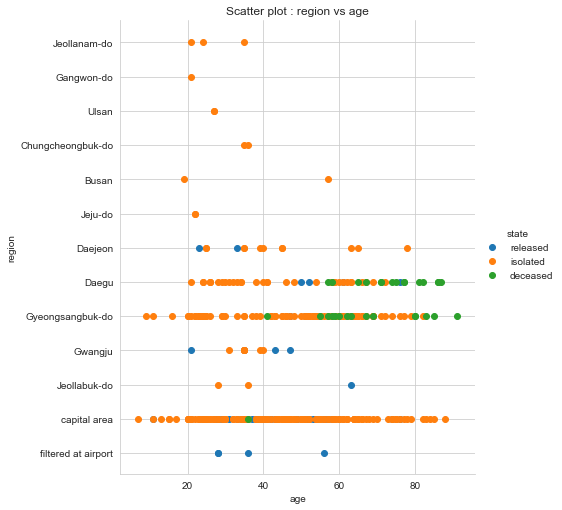

In [70]:
sns.set_style("whitegrid")
sns.FacetGrid(patient, hue = 'state', size = 7).map(plt.scatter, 'age', 'region').add_legend()
plt.title('Scatter plot : region vs age')
plt.show()